In [52]:
# 图像查看
from datasets import nii_reader
import matplotlib.pyplot as plt

c0 = nii_reader('datasets/train/all_image/patient20_C0.nii.gz')
lge = nii_reader('datasets/train/all_image/patient20_LGE.nii.gz')
c0_lge = nii_reader('datasets/train/c0_lge/patient20_C0.nii.gz')
index = 5
print(c0[index].shape)
print(lge[index].shape)
print(c0_lge[index].shape)

(304, 304)
(290, 290)
(304, 304)


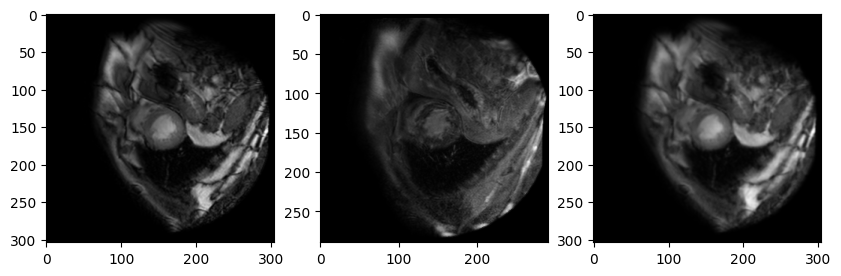

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)  
plt.imshow(c0[index],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(lge[index],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(c0_lge[index],cmap='gray')

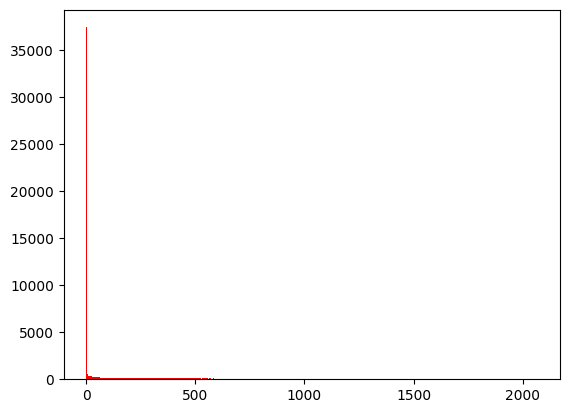

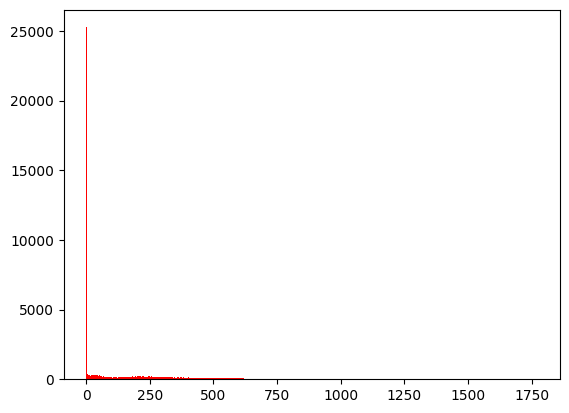

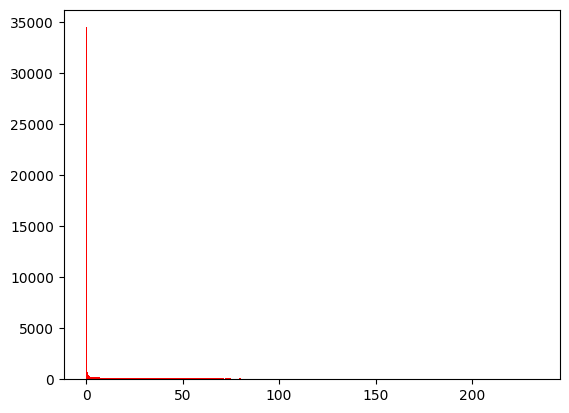

In [54]:
from utils import drawhistogram
drawhistogram(c0[index])
drawhistogram(lge[index])
drawhistogram(c0_lge[index])